<a href="https://colab.research.google.com/github/MSR806/Deep-Learning/blob/master/DL_SomeMorePythonBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#More Pandas

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 15y_8PAdtCwEOtS6KNpNmdEdmeUFyFPzM


In [ ]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title Sample file.txt, id 15y_8PAdtCwEOtS6KNpNmdEdmeUFyFPzM


In [ ]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1f37xtn-4nwuQm3rEzd_FD4BvJ2RRW7ez' #https://drive.google.com/file/d/1f37xtn-4nwuQm3rEzd_FD4BvJ2RRW7ez/view?usp=sharing
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "OrderDate,Region,Rep,Item,Units,Unit Cost,Total
1-6-19,East,Jones,Pencil,95, 1.99 , 189.05 
1-23-19,Central,Kivell,Binder,50, 19.99 , 999.50 
2-9-19,Central,Jardine,Pencil,36, 4.99 , 179.64 
2-26-19,Central,Gill,Pen,27, 19.99 , 539.73 
3-15-19,West,Sorvino,Pencil,56, 2.99 , 167.44 
4-1-19,East,Jones,Binder,60, 4.99 , 299.40 
4-18-19,Central,Andrews,Pencil,75, 1.99 , 149.25 
5-5-19,Central,Jardine,Pencil,90, 4.99 , 449.10 
5-22-19,West,Thompson,Pencil,32, 1.99 , 63.68 
6-8-19,East,Jones,Binder,60, 8.99 , 539.40 
6-25-19,Central,Morgan,Pencil,90, 4.99 , 449.10 
7-12-19,East,Howard,Binder,29, 1.99 , 57.71 
7-29-19,East,Parent,Binder,81, 19.99 ," 1,619.19 "
8-15-19,East,Jones,Pencil,35, 4.99 , 174.65 
9-1-19,Central,Smith,Desk,2, 125.00 , 250.00 
9-18-19,East,Jones,Pen Set,16, 15.99 , 255.84 
10-5-19,Central,Morgan,Binder,28, 8.99 , 251.72 
10-22-19,East,Jones,Pen,64, 8.99 , 575.36 
11-8-19,East,Parent,Pen,15, 19.99 , 299.85 
11-25-19,Central,Kivell,Pen Set,96, 4.99 , 4

In [ ]:
!ls

adc.json  sample_data


In [ ]:
downloaded.GetContentFile('sales.csv')

In [ ]:
!ls

adc.json  sales.csv  sample_data


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('sales.csv')

In [ ]:
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total
0,1-6-19,East,Jones,Pencil,95,1.99,189.05
1,1-23-19,Central,Kivell,Binder,50,19.99,999.50
2,2-9-19,Central,Jardine,Pencil,36,4.99,179.64
3,2-26-19,Central,Gill,Pen,27,19.99,539.73
4,3-15-19,West,Sorvino,Pencil,56,2.99,167.44


In [ ]:
df.type()

AttributeError: ignored

In [ ]:
type?

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
dir(df)

In [ ]:
df.tail()

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total
38,10-14-20,West,Thompson,Binder,57,19.99,"1,139.43"
39,10-31-20,Central,Andrews,Pencil,14,1.29,18.06
40,11-17-20,Central,Jardine,Binder,11,4.99,54.89
41,12-4-20,Central,Jardine,Binder,94,19.99,"1,879.06"
42,12-21-20,Central,Andrews,Binder,28,4.99,139.72


In [ ]:
len(df)

43

In [ ]:
df.shape

(43, 7)

In [ ]:
df.loc[5]

OrderDate      4-1-19
Region           East
Rep             Jones
Item           Binder
Units              60
Unit Cost        4.99
Total         299.40 
Name: 5, dtype: object

In [ ]:
df_short = df[0:5]

In [ ]:
df_short.shape

(5, 7)

In [ ]:
df_thin = df[['Item', 'Units', 'Unit Cost', 'Total']]

In [ ]:
df_thin.shape

(43, 4)

In [ ]:
df_thin

,Item,Units,Unit Cost,Total
0,Pencil,95,1.99,189.05
1,Binder,50,19.99,999.50
2,Pencil,36,4.99,179.64
3,Pen,27,19.99,539.73
4,Pencil,56,2.99,167.44
5,Binder,60,4.99,299.40
6,Pencil,75,1.99,149.25
7,Pencil,90,4.99,449.10
8,Pencil,32,1.99,63.68
9,Binder,60,8.99,539.40


In [ ]:
df_pencil = df_thin[df_thin['Item'] == 'Pencil']

In [ ]:
df_pencil

,Item,Units,Unit Cost,Total
0,Pencil,95,1.99,189.05
2,Pencil,36,4.99,179.64
4,Pencil,56,2.99,167.44
6,Pencil,75,1.99,149.25
7,Pencil,90,4.99,449.10
8,Pencil,32,1.99,63.68
10,Pencil,90,4.99,449.10
13,Pencil,35,4.99,174.65
20,Pencil,67,1.29,86.43
27,Pencil,66,1.99,131.34


In [ ]:
df_pencil_1 = df_thin[df_thin.Item == 'Pencil']

In [ ]:
df_pencil_1

,Item,Units,Unit Cost,Total
0,Pencil,95,1.99,189.05
2,Pencil,36,4.99,179.64
4,Pencil,56,2.99,167.44
6,Pencil,75,1.99,149.25
7,Pencil,90,4.99,449.10
8,Pencil,32,1.99,63.68
10,Pencil,90,4.99,449.10
13,Pencil,35,4.99,174.65
20,Pencil,67,1.29,86.43
27,Pencil,66,1.99,131.34


In [ ]:
df_thin['Total'].min()

' 1,005.90 '

In [ ]:
df_thin['Total'].max()

' 999.50 '

In [ ]:
df_thin['Total'].describe()

count           43
unique          41
top        479.04 
freq             2
Name: Total, dtype: object

In [ ]:
df_thin['Unit Cost'].describe()

count     43.000000
mean      20.308605
std       47.345118
min        1.290000
25%        3.990000
50%        4.990000
75%       17.990000
max      275.000000
Name: Unit Cost, dtype: float64

In [ ]:
df_thin.describe()

,Units,Unit Cost
count,43.000000,43.000000
mean,49.325581,20.308605
std,30.078248,47.345118
min,2.000000,1.290000
25%,27.500000,3.990000
50%,53.000000,4.990000
75%,74.500000,17.990000
max,96.000000,275.000000


In [ ]:
df_thin[df_thin.Item == 'Pencil']['Unit Cost'].mean()

2.7746153846153847

In [ ]:
df_thin[df_thin.Item == 'Pen']['Unit Cost'].mean()

11.190000000000001

In [ ]:
g = df_thin.groupby(['Item'])

In [ ]:
for key,df_key in g:
  print(key)
  print(df_key)

Binder
      Item  Units  Unit Cost       Total
1   Binder     50      19.99     999.50 
5   Binder     60       4.99     299.40 
9   Binder     60       8.99     539.40 
11  Binder     29       1.99      57.71 
12  Binder     81      19.99   1,619.19 
16  Binder     28       8.99     251.72 
22  Binder     46       8.99     413.54 
23  Binder     87      15.00   1,305.00 
24  Binder      4       4.99      19.96 
25  Binder      7      19.99     139.93 
30  Binder     80       8.99     719.20 
38  Binder     57      19.99   1,139.43 
40  Binder     11       4.99      54.89 
41  Binder     94      19.99   1,879.06 
42  Binder     28       4.99     139.72 
Desk
    Item  Units  Unit Cost     Total
14  Desk      2      125.0   250.00 
31  Desk      5      125.0   625.00 
35  Desk      3      275.0   825.00 
Pen
   Item  Units  Unit Cost     Total
3   Pen     27      19.99   539.73 
17  Pen     64       8.99   575.36 
18  Pen     15      19.99   299.85 
28  Pen     96       4.99   479.04 


In [ ]:
df_thin.groupby(['Item']).mean()

,Units,Unit Cost
Item,,
Binder,48.133333,11.524000
Desk,3.333333,175.000000
Pen,55.600000,11.190000
Pen Set,56.428571,11.912857
Pencil,55.076923,2.774615


In [ ]:
df_thin.groupby(['Item']).describe()

Units                              ... Unit Cost                        
        count       mean        std   min  ...       25%     50%     75%     max
Item                                       ...                                  
Binder   15.0  48.133333  29.609040   4.0  ...      4.99    8.99   19.99   19.99
Desk      3.0   3.333333   1.527525   2.0  ...    125.00  125.00  200.00  275.00
Pen       5.0  55.600000  33.857052  15.0  ...      4.99    8.99   19.99   19.99
Pen Set   7.0  56.428571  25.138663  16.0  ...      4.99   12.49   15.99   23.95
Pencil   13.0  55.076923  28.860185   7.0  ...      1.29    1.99    4.99    4.99

[5 rows x 16 columns]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


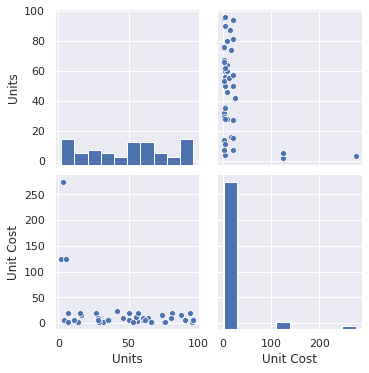

In [ ]:
ax = sns.pairplot(df_thin, diag_kind = 'hist')

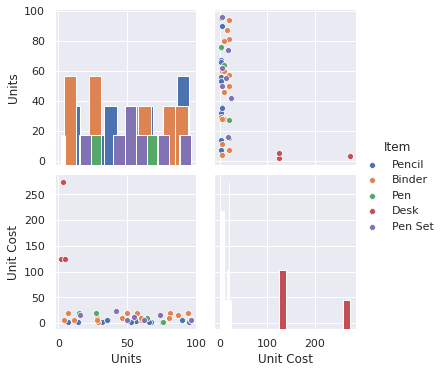

In [ ]:
ax = sns.pairplot(df_thin, diag_kind = 'hist', hue = 'Item')

#Debugging

In [ ]:
import random

In [ ]:
def factorial(x):
  if x==0:
    return 1
  return x*factorial(x-1)

In [ ]:
factorial(5)

120

In [ ]:
factorial(4)

24

In [ ]:
def code_to_debug():
  import pdb; pdb.set_trace()
  for i in range(10):
    x = random.random()
    factorial(x)

In [ ]:
code_to_debug()

> <ipython-input-62-6ef1c1c1b623>(3)code_to_debug()
-> for i in range(10):
(Pdb) n
> <ipython-input-62-6ef1c1c1b623>(4)code_to_debug()
-> x = random.random()
(Pdb) n
> <ipython-input-62-6ef1c1c1b623>(5)code_to_debug()
-> factorial(x)
(Pdb) ?

Documented commands (type help <topic>):
EOF    c          d        h         list      q        rv       undisplay
a      cl         debug    help      ll        quit     s        unt      
alias  clear      disable  ignore    longlist  r        source   until    
args   commands   display  interact  n         restart  step     up       
b      condition  down     j         next      return   tbreak   w        
break  cont       enable   jump      p         retval   u        whatis   
bt     continue   exit     l         pp        run      unalias  where    

Miscellaneous help topics:
exec  pdb

(Pdb) step/
--Call--
> <ipython-input-53-90222597d128>(1)factorial()
-> def factorial(x):
(Pdb) setp?
*** SyntaxError: invalid syntax
(Pdb) help step
s(

BdbQuit: ignored

In [ ]:
def factorial_debugged(x):
  if (not isinstance(x,int)):
    print('This method is not for float numbers')
    return
  if x <0:
    print('This method is not for negative integers')
    return
  if x==0:
    return 1
  return x*factorial(x-1)

In [ ]:
def code_to_debug():
  import pdb; pdb.set_trace()
  for i in range(10):
    x = random.random()
    factorial_debugged(x)

In [ ]:
code_to_debug()

> <ipython-input-85-75d28099707d>(3)code_to_debug()
-> for i in range(10):
(Pdb) continue
This method is not for float numbers
This method is not for float numbers
This method is not for float numbers
This method is not for float numbers
This method is not for float numbers
This method is not for float numbers
This method is not for float numbers
This method is not for float numbers
This method is not for float numbers
This method is not for float numbers


In [ ]:
%xmode Verbose

Exception reporting mode: Verbose


In [ ]:
def code_to_debug():
  #import pdb; pdb.set_trace()
  for i in range(10):
    x = random.random()
    factorial(x)

In [ ]:
code_to_debug()

RecursionError: ignored

In [ ]:
def factorial(x):
  if x==0:
    return 1
  print('x = ',x)
  return

In [ ]:
factorial(5)

x =  5


In [ ]:
factorial(0)

1